In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2022-01-20"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2022_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-01-20,가루비누,"세탁용세제(LG테크),가루형,3.0kg",10425,사상구,13425,사상구,3000,28.78%,"11,925"
1,2022-01-20,간장,오복왕표 0.9ℓ 1병,8417,사상구,9264,사상구,847,10.06%,"8,841"
2,2022-01-20,갈치,60cm정도 500g 1마리(냉동),15800,사상구,18625,사상구,2825,17.88%,"17,213"
3,2022-01-20,고등어,30㎝정도 500g 1마리,5240,사상구,7541,사상구,2301,43.91%,"6,391"
4,2022-01-20,달걀,오경슈퍼란60g정도 10개,3980,사상구,4300,사상구,320,8.04%,"4,140"
5,2022-01-20,닭고기,육계 1.0㎏,7480,사상구,7590,사상구,110,1.47%,"7,535"
6,2022-01-20,대파,1.0㎏,2920,사상구,2990,사상구,70,2.4%,"2,955"
7,2022-01-20,돼지고기,삼겹살 500g,9950,사상구,14800,사상구,4850,48.74%,"12,375"
8,2022-01-20,두부,500g 판두부(국산포장두부 420g) 1모,5194,사상구,5194,사상구,0,0.0%,"5,194"
9,2022-01-20,라면,신라면 120g 1봉지,736,사상구,736,사상구,0,0.0%,736


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2022-04-21"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2022_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-04-21,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6712,사상구,13087,사상구,6375,94.98%,"9,900"
1,2022-04-21,간장,오복왕표 0.9ℓ 1병,8417,사상구,9264,사상구,847,10.06%,"8,841"
2,2022-04-21,갈치,60cm정도 500g 1마리(냉동),13040,사상구,16635,사상구,3595,27.57%,"14,838"
3,2022-04-21,고등어,30㎝정도 500g 1마리,6250,사상구,6715,사상구,465,7.44%,"6,483"
4,2022-04-21,달걀,오경슈퍼란60g정도 10개,3890,사상구,3980,사상구,90,2.31%,"3,935"
5,2022-04-21,닭고기,육계 1.0㎏,8280,사상구,12990,사상구,4710,56.88%,"10,635"
6,2022-04-21,대파,1.0㎏,2990,사상구,3310,사상구,320,10.7%,"3,150"
7,2022-04-21,돼지고기,삼겹살 500g,11900,사상구,13900,사상구,2000,16.81%,"12,900"
8,2022-04-21,두부,500g 판두부(국산포장두부 420g) 1모,5194,사상구,5194,사상구,0,0.0%,"5,194"
9,2022-04-21,라면,신라면 120g 1봉지,736,사상구,736,사상구,0,0.0%,736


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2022-07-21"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2022_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-07-21,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6543,사상구,14850,사상구,8307,126.96%,"10,697"
1,2022-07-21,간장,오복왕표 0.9ℓ 1병,8417,사상구,9264,사상구,847,10.06%,"8,841"
2,2022-07-21,갈치,60cm정도 500g 1마리(냉동),13300,사상구,14875,사상구,1575,11.84%,"14,088"
3,2022-07-21,고등어,30㎝정도 500g 1마리,6185,사상구,6555,사상구,370,5.98%,"6,370"
4,2022-07-21,달걀,오경슈퍼란60g정도 10개,3890,사상구,3980,사상구,90,2.31%,"3,935"
5,2022-07-21,닭고기,육계 1.0㎏,9990,사상구,10875,사상구,885,8.86%,"10,433"
6,2022-07-21,대파,1.0㎏,2105,사상구,2920,사상구,815,38.72%,"2,513"
7,2022-07-21,돼지고기,삼겹살 500g,11550,사상구,12950,사상구,1400,12.12%,"12,250"
8,2022-07-21,두부,500g 판두부(국산포장두부 420g) 1모,4520,사상구,4520,사상구,0,0.0%,"4,520"
9,2022-07-21,라면,신라면 120g 1봉지,728,사상구,736,사상구,8,1.1%,732


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2022-10-20"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2022_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-10-20,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6543,사상구,14850,사상구,8307,126.96%,"10,697"
1,2022-10-20,간장,오복왕표 0.9ℓ 1병,8417,사상구,9264,사상구,847,10.06%,"8,841"
2,2022-10-20,갈치,60cm정도 500g 1마리(냉동),15980,사상구,18625,사상구,2645,16.55%,"17,303"
3,2022-10-20,고등어,30㎝정도 500g 1마리,5500,사상구,5810,사상구,310,5.64%,"5,655"
4,2022-10-20,달걀,오경슈퍼란60g정도 10개,3890,사상구,3980,사상구,90,2.31%,"3,935"
5,2022-10-20,닭고기,육계 1.0㎏,9980,사상구,14990,사상구,5010,50.2%,"12,485"
6,2022-10-20,대파,1.0㎏,3160,사상구,3536,사상구,376,11.9%,"3,348"
7,2022-10-20,돼지고기,삼겹살 500g,13900,사상구,14000,사상구,100,0.72%,"13,950"
8,2022-10-20,두부,500g 판두부(국산포장두부 420g) 1모,4487,사상구,4962,사상구,475,10.59%,"4,725"
9,2022-10-20,라면,신라면 120g 1봉지,820,사상구,820,사상구,0,0.0%,820


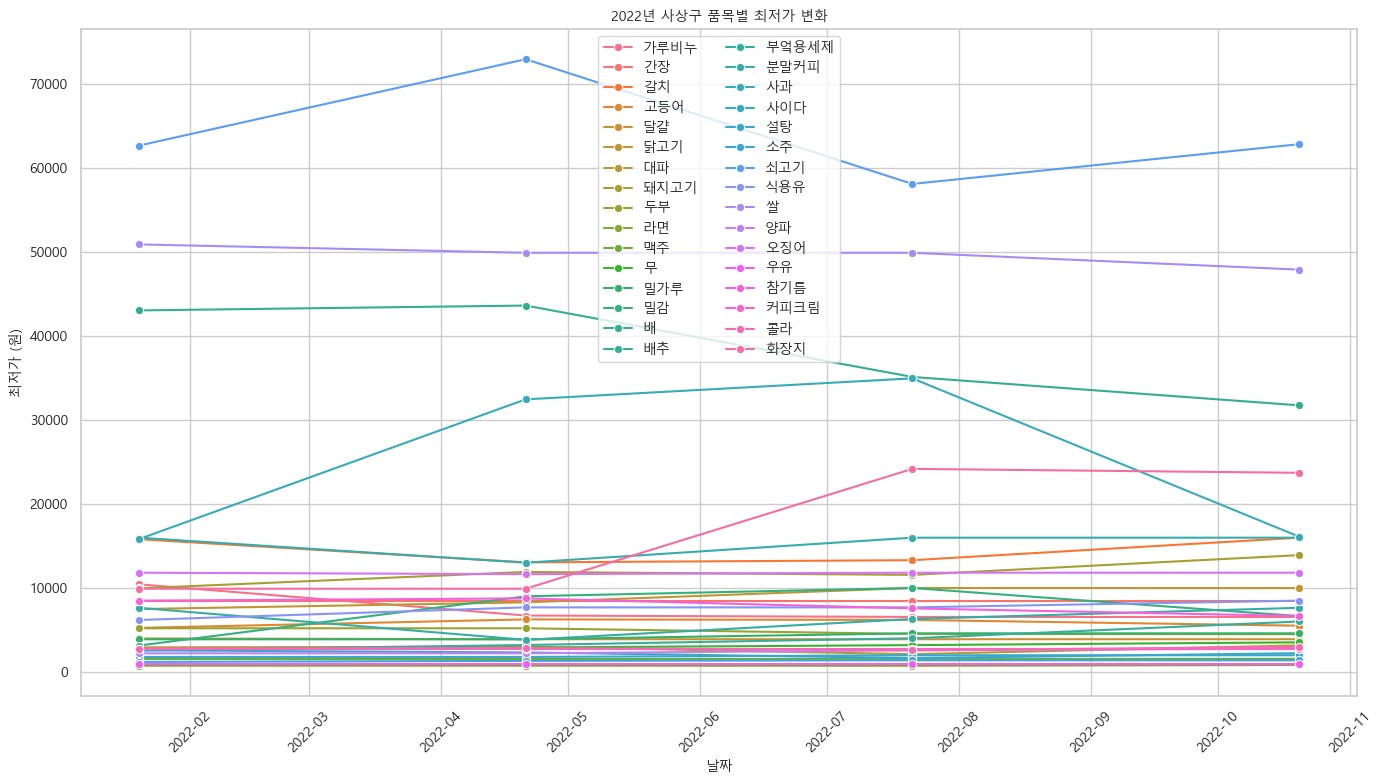

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사상구2022_1q.csv")
q2 = pd.read_csv("사상구2022_2q.csv")
q3 = pd.read_csv("사상구2022_3q.csv")
q4 = pd.read_csv("사상구2022_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2022년 사상구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("사상구2022_min.csv", index=False, encoding="utf-8-sig")

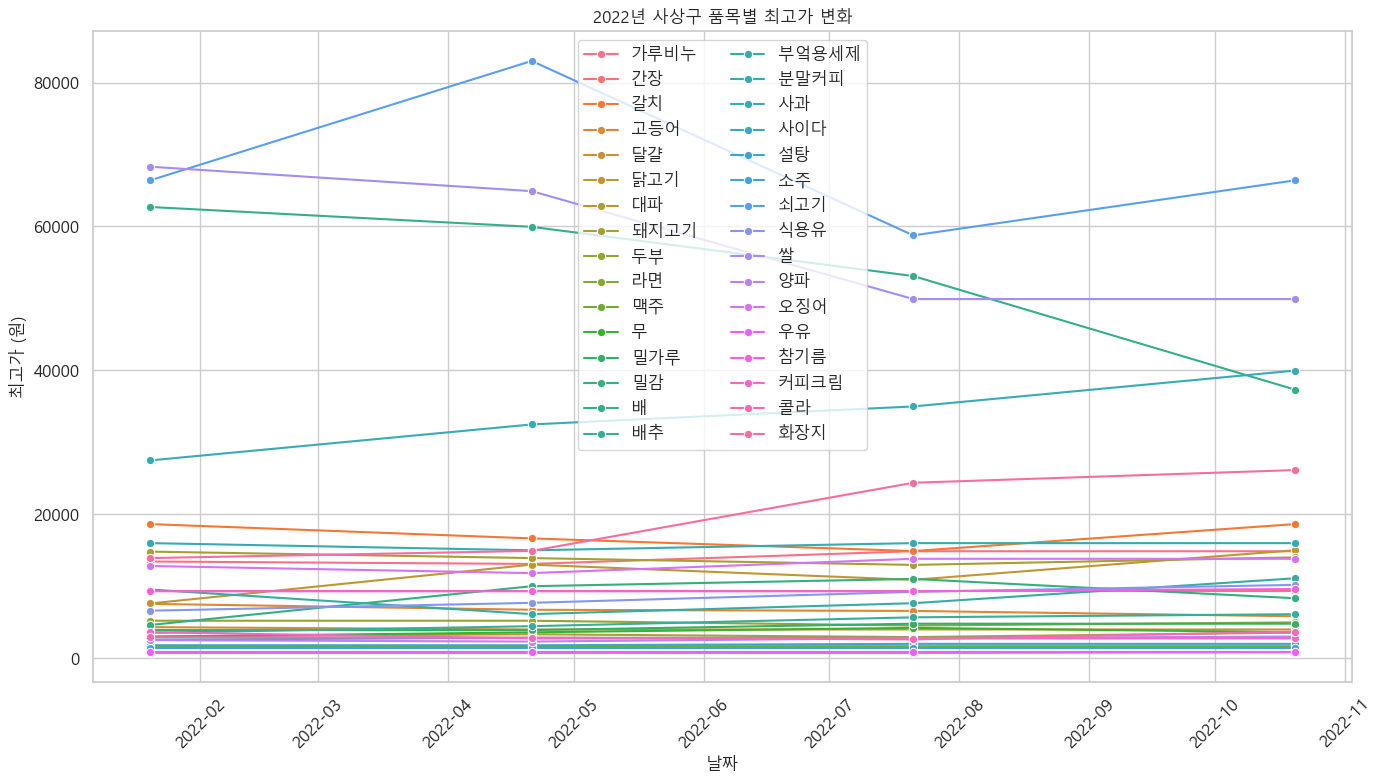

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사상구2022_1q.csv")
q2 = pd.read_csv("사상구2022_2q.csv")
q3 = pd.read_csv("사상구2022_3q.csv")
q4 = pd.read_csv("사상구2022_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2022년 사상구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("사상구2022_max.csv", index=False, encoding="utf-8-sig")